Визуализация линейных разделителей и векторов коэффициентов

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

In [3]:
np.random.seed(1443)

Сгенерируем двумерные точки, которые необходимо классифицировать на два класса

In [4]:
X,y = make_blobs(n_samples=20, centers=2)

In [5]:
print(y)
print(X)

[0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0]
[[  3.42524647 -10.29195818]
 [  4.96386009   7.35207107]
 [  4.87420651   8.76849274]
 [  0.42299662  -8.19892494]
 [  4.66246308   8.0488778 ]
 [  2.35888287 -10.07907724]
 [  5.65360266   6.44923396]
 [  5.08614132   7.86093946]
 [  6.18501243   6.62938243]
 [  2.33795142  -9.29514493]
 [  6.29548353   9.52057808]
 [  6.33303799   7.1637598 ]
 [  6.79900874   6.0735903 ]
 [  2.59361786 -11.66658405]
 [  1.46789252 -10.45087826]
 [  3.62023073 -11.26110036]
 [  4.07776176 -11.10505408]
 [  1.02405117 -10.09418457]
 [  7.65423998   8.48828069]
 [  2.72311971 -10.28194693]]


In [6]:
from matplotlib.colors import ListedColormap

In [7]:
cm = ListedColormap(['blue', 'green'])

Отобразим их на плоскости. Экземпляры класса 1 показаны зелёным цветом, класса 0 - синим.

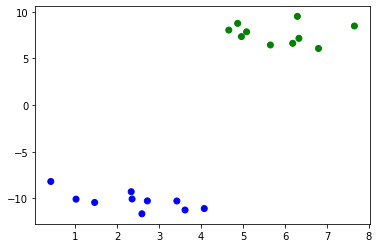

In [8]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm)

Натренируем модель логистической регрессии. Она предсказывает вероятность класса 1 для данного экземпляра данных $\vec{x}$ и имеет вид:

$$P(c=1|\vec{x}) = \sigma(z)$$
$$z = w_1x_1 + w_2x_2 + b$$
Где функция:
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$ 
монотонно преобразует произвольное число $z$ в интервал $[0,1]$ (вероятность)

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

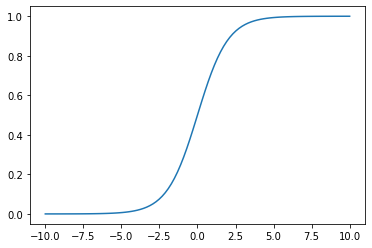

In [11]:
sigmoid_input = np.linspace(-10,10, 100)
plt.plot(sigmoid_input, sigmoid(sigmoid_input))
plt.show()

Построим и обучим модель. <br>
Под обучением подразумевается поиск таких значений параметров $w_1, w_2, b$, при которых вероятность класса 1 для экземпляров класса 1 максимизируется и наоборот, максимизируется вероятность класса 0 для экземпляров класса 0.
Поскольку у нас всего два класса, то $P(c=0|\vec{x}) = 1 - P(c=1|\vec{x})$.<br>
Вместе $p_0 = P(c=0|\vec{x})$ и $p_1 = P(c=1|\vec{x})$ составляют распределение вероятности над классом $P(c|\vec{x}) = [p_0, p_1]$.

Чтобы найти значение параметров при помощи градиентного спуска, нужен дифференцируемый минизируемый критерий. Один из таких критериев - кросс-энтропия распределения. Для каждого экземпляра $\vec{x}$ имеется истинное распределение вероятности 

In [12]:
logr = LogisticRegression().fit(X,y)

/root/.pyenv/versions/3.7.3/envs/general37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Вытащим её параметры.

In [13]:
w1, w2 = logr.coef_[0]
b = logr.intercept_[0]
# w1x1 + w2x2 + b = 0 ; x2 = -(w1x1 + b) / w2

In [14]:
print(logr.coef_[0])

[0.17178027 0.60966286]


In [15]:
x_range = np.array([X[:,0].min() - .5, X[:,0].max() + .5])
y_range = np.array([X[:,1].min() - .5, X[:,1].max() + .5])
x_min, x_max = x_range
y_min, y_max = y_range
grid_x_min, grid_x_max = min(x_min, w1-1), max(x_max, w1+1)
grid_y_min, grid_y_max = min(y_min, w2-1), max(y_max, w2+1)

In [16]:
xx, yy = np.mgrid[grid_x_min:grid_x_max:100j, grid_y_min:grid_y_max:100j]

In [17]:
print(xx.shape)

(100, 100)


Исследуем свойства модели:
$$P(c=1|\vec{x}) = \sigma(z)$$
$$z = w_1x_1 + w_2x_2 + b$$

In [18]:
zz = w1 * xx + w2 * yy + b

In [19]:
y_sep = -(w1 * x_range + b) / w2

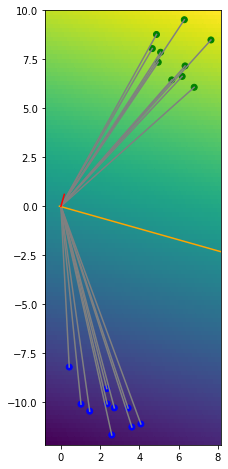

In [21]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot('111')
ax.pcolormesh(xx,yy,zz.reshape(xx.shape))
for x1, x2 in X:
    ax.plot([0,x1],[0,x2], color='grey')

ax.plot(x_range, y_sep, color='orange')
ax.plot([0, w1], [0, w2], color='red')
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm)
ax.set_aspect('equal')
plt.show()


Небинарная классификация

In [ ]:
X,y = make_blobs(n_samples=30, centers=4)

In [ ]:
cm = ListedColormap(['red', 'green', 'blue', 'black'])

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm)

In [ ]:
logr = LogisticRegression().fit(X,y)

In [ ]:
# print(X.dot(logr.coef_.T) + logr.intercept_)

In [ ]:
cm.colors[1]

In [ ]:
normalized_coef = logr.coef_ / np.linalg.norm(logr.coef_, axis=1).reshape(-1,1)

In [ ]:
x_range = np.array([X[:,0].min() - .5, X[:,0].max() + .5])
y_range = np.array([X[:,1].min() - .5, X[:,1].max() + .5])
x_min, x_max = x_range
y_min, y_max = y_range
grid_x_min, grid_x_max = min(x_min, w1-1), max(x_max, w1+1)
grid_y_min, grid_y_max = min(y_min, w2-1), max(y_max, w2+1)

In [ ]:
xx, yy = np.mgrid[grid_x_min:grid_x_max:200j, grid_y_min:grid_y_max:200j]

In [ ]:
zz = logr.predict(np.column_stack((xx.ravel(),yy.ravel()))).reshape(xx.shape)
# zz = np.column_stack((xx.ravel(),yy.ravel())).dot(logr.coef_.T).argmax(1)
# zz = np.column_stack((xx.ravel(),yy.ravel())).dot(normalized_coef.T).argmax(1)
print(zz.shape)

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot('111')
ax.pcolormesh(xx,yy,zz.reshape(xx.shape), cmap=cm, alpha=0.2)
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm)
for x1, x2 in X:
    ax.plot([0,x1],[0,x2], color='grey', linestyle='--')
for c,w in enumerate(normalized_coef * 5):
    ax.plot([0, w[0]], [0, w[1]], color=cm.colors[c], linestyle='--')
    ax.plot([0, logr.coef_[c,0]],[0, logr.coef_[c,1]], color=cm.colors[c], linewidth=3)
ax.set_aspect('equal')